# Dataset 1: Synthetic Circle


## Introduction


## Exploratory Data Analysis (EDA)

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("circles.txt")

### Reading and Data Preprocessing

In this section, we will take a look at the structure of the data.


In [10]:
df.head()

x          y  class
0    3.15676  116.12252      6
1   16.14436   16.81660     11
2  100.31212   64.99025     53
3   -1.33773   84.81772      4
4  104.37328   62.42373     53

In [14]:
df.tail()

x          y  class
9995   -4.85337  138.79801      7
9996  135.75636   77.35585     74
9997   81.18879  184.85662     49
9998  116.47674  116.45223     66
9999  120.84808   75.07245     64

In [47]:
df.describe()

x             y         class
count  10000.000000  10000.000000  10000.000000
mean      89.981670     90.003827     49.500000
std       57.457467     57.559719     28.867513
min       -5.000000     -4.999860      0.000000
25%       40.237885     40.133840     24.750000
50%       89.999995     90.000080     49.500000
75%      139.898800    139.977695     74.250000
max      184.999920    185.000000     99.000000

In [17]:
df.shape

(10000, 3)

In [24]:
df.isnull().sum()

x        0
y        0
class    0
dtype: int64

In [26]:
df.dtypes

x        float64
y        float64
class      int64
dtype: object

In [30]:
df.duplicated().sum()

0

So upon looking at the data, we see that there are no missing values, and all values are of the float type. Additionally, there are no duplicates in the dataset. We will now move on to the next section - Exploratory Data Analysis (EDA).

### Data Visualization

In this section, we aim to visually explore the data.

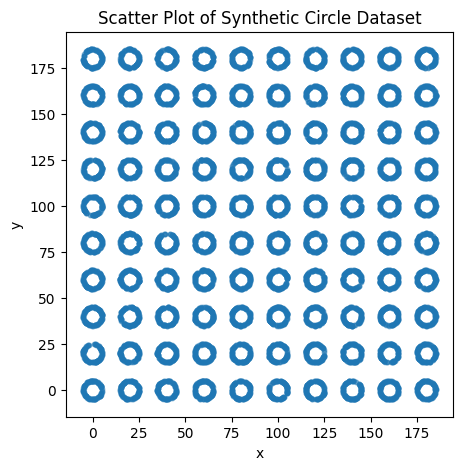

In [57]:
plt.figure(figsize=(5,5))
plt.scatter(df["x"], df["y"], s = 10, alpha = 0.5)
plt.title("Scatter Plot of Synthetic Circle Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

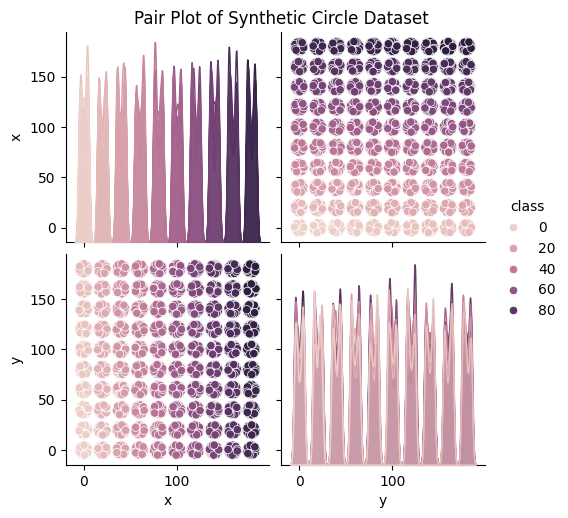

In [71]:
pairplot = sns.pairplot(df, hue='class')
pairplot.fig.suptitle("Pair Plot of Synthetic Circle Dataset", y=1.02)
plt.show()

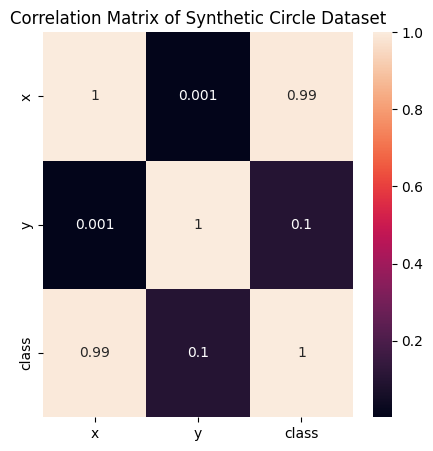

In [73]:
number_df = df.select_dtypes(include = [np.number])
correlation_matrix = number_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix of Synthetic Circle Dataset")
plt.show()

Result of EDA blah blah

## Clustering Methods

### K-Means Implementation

Algorithm description.....

In [37]:
import numpy as np
import random

class KMeansClustering:
    def __init__(self, k, epsilon = 1e-9, max_iter = 2000):
        self.k = k
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.centroids = []
        self.clusters = []

    def cluster_points(self, points):
        """ 
        Measure distance to each centroid and assign points to the nearest cluster 
        """
        self.clusters = []
        for i in range(self.k):
            self.clusters.append([])
        for point in points:
            pt_distances = [np.linalg.norm(point - self.centroids[i], axis=0) for i in range(self.k)]
            closest_cluster_index = int(np.argmin(pt_distances))
            self.clusters[closest_cluster_index].append(point)

    def recalculate_centroid(self):
        """
        recalculate centroid to be the mean of all of its cluster's points
        """
        for i in range(self.k):
            if len(self.clusters[i]) > 0:
                self.centroids[i] = np.mean(self.clusters[i], axis=0)
            else:
                self.centroids[i] = self.centroids[i]

    def convergence(self, old_centroids):
        """
        Checks convergence
        """
        all_distances = np.linalg.norm(np.array(old_centroids) - np.array(self.centroids), axis=1)
        max_dist = all_distances.max()
        return max_dist < self.epsilon

    def fit(self, points):
        """
        training k-means model
        """
        points = np.array(points)
        self.centroids = random.sample(list(points), self.k)
        for i in range(self.max_iter):
            old_centroids = self.centroids.copy()
            self.cluster_points(points)
            self.recalculate_centroid()
            if self.convergence(old_centroids):
                print(f"Converged at {i+1} iteration")
                break
        return self.clusters


In [66]:
X = df[["x", "y"]].to_numpy()

kmeans = KMeansClustering(k=100, epsilon = 1e-4, max_iter = 500)
clusters = kmeans.fit(X)

Converged at 15 iteration


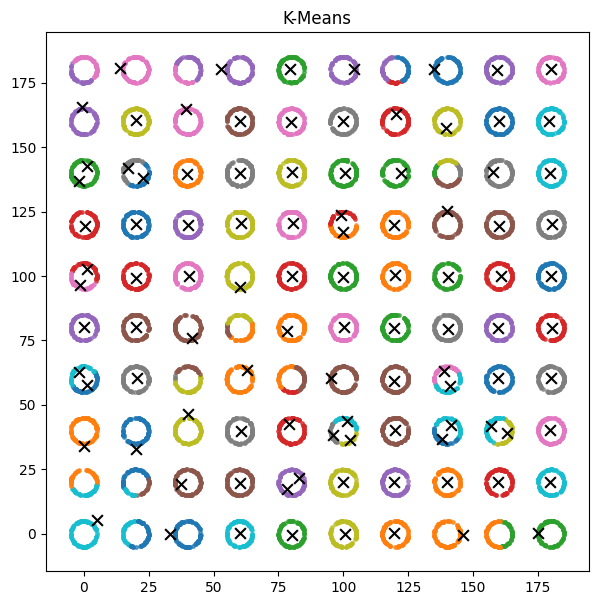

In [68]:
plt.figure(figsize = (7, 7))
for cluster in clusters:
    cluster = np.array(cluster)
    if len(cluster):
        plt.scatter(cluster[:,0], cluster[:,-1], s =6, alpha = 0.7)
centroids = np.array(kmeans.centroids)
plt.scatter(centroids[:,0], centroids[:,1], c='k', s=60, marker='x')
plt.title('K-Means')
plt.show()

Now that we have our clustering, let us evaluate this with Davies–Bouldin Index.

In [71]:
centroids = np.array(kmeans.centroids)

def assign_labels_from_centroids(X, centroids):
    d = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)  # (n,k)
    return np.argmin(d, axis=1)

labels = assign_labels_from_centroids(X, centroids)


In [73]:
def davies_bouldin_index(X, labels, centroids, eps=1e-12):
    K = len(centroids)
    S = np.zeros(K, dtype=float)
    for k in range(K):
        pts = X[labels == k]
        if len(pts) == 0:
            S[k] = 0.0
        else:
            S[k] = np.mean(np.linalg.norm(pts - centroids[k], axis=1))

    # centroid distances M_{ij}
    M = np.linalg.norm(centroids[:, None, :] - centroids[None, :, :], axis=2) + eps

    # R_{ij} = (S_i + S_j) / M_{ij}; for i!=j
    R = (S[:, None] + S[None, :]) / M
    np.fill_diagonal(R, -np.inf)  # ignore i=j

    # D_i = max_j R_{ij}; DBI = mean_i D_i
    D = np.max(R, axis=1)
    return float(np.mean(D))


In [75]:
dbi = davies_bouldin_index(X, labels, centroids)
print("Davies–Bouldin Index:", round(dbi, 6))

Davies–Bouldin Index: 0.682591


### DBSCAN Implementation

Algorithm description....

In [84]:
import numpy as np
from collections import deque

class DBSCAN:
    def __init__(self, eps, min_pts):
        self.eps = float(eps)
        self.min_pts = int(min_pts)
        self.core_sample_mask_ = None
        self.n_clusters_ = 0
        self.labels_ = None
        
    def _region_query(self, points, i):
        neighbours = []
        for j in range(len(points)):
            if np.linalg.norm(points[i] - points[j]) <= self.eps:
                neighbours.append(j)
        return np.array(neighbours)

    def fit(self, points):
        points = np.array(points)
        N = len(points)
        self.labels_ = -np.ones(N, dtype=int)
        visited = np.zeros(N, dtype=bool)
        self.core_sample_mask_ = np.zeros(N, dtype=bool)

        neighborhoods = [self._region_query(points, i) for i in range(N)]

        for i in range(N):
            if len(neighborhoods[i]) >= self.min_pts:
                self.core_sample_mask_[i] = True

        cluster_id = 0
        for i in range(N):
            if visited[i]:
                continue
            visited[i] = True

            if not self.core_sample_mask_[i]:
                continue

            self.labels_[i] = cluster_id
            queue = deque([i])

            while queue:
                j = queue.popleft()
                if not self.core_sample_mask_[j]:
                    continue
                for k in neighborhoods[j]:
                    if not visited[k]:
                        visited[k] = True
                        if self.core_sample_mask_[k]:
                            queue.append(k)
                    if self.labels_[k] == -1:
                        self.labels_[k] = cluster_id
            cluster_id += 1

        self.n_clusters_ = cluster_id
        return self

    def fit_predict(self, X):
        return self.fit(X).labels_


In [96]:
X = df[["x", "y"]].to_numpy()

In [100]:
db = DBSCAN(eps=0.25, min_pts=5)
labels = db.fit_predict(X)

print("Clusters:", db.n_clusters_)
print("Noise points:", (labels == -1).sum())
print("Per-cluster counts:", {c:int((labels==c).sum()) for c in range(db.n_clusters_)})

Clusters: 253
Noise points: 8536
Per-cluster counts: {0: 12, 1: 5, 2: 8, 3: 5, 4: 8, 5: 8, 6: 7, 7: 6, 8: 5, 9: 5, 10: 9, 11: 5, 12: 5, 13: 7, 14: 5, 15: 5, 16: 5, 17: 8, 18: 5, 19: 6, 20: 5, 21: 5, 22: 5, 23: 7, 24: 10, 25: 5, 26: 10, 27: 5, 28: 5, 29: 9, 30: 5, 31: 8, 32: 8, 33: 7, 34: 5, 35: 6, 36: 9, 37: 5, 38: 13, 39: 6, 40: 6, 41: 6, 42: 6, 43: 6, 44: 6, 45: 5, 46: 7, 47: 5, 48: 8, 49: 10, 50: 8, 51: 6, 52: 5, 53: 5, 54: 5, 55: 5, 56: 6, 57: 5, 58: 5, 59: 6, 60: 5, 61: 9, 62: 5, 63: 5, 64: 5, 65: 5, 66: 5, 67: 7, 68: 8, 69: 7, 70: 6, 71: 5, 72: 5, 73: 7, 74: 9, 75: 5, 76: 7, 77: 7, 78: 6, 79: 5, 80: 5, 81: 7, 82: 6, 83: 5, 84: 5, 85: 8, 86: 6, 87: 9, 88: 6, 89: 5, 90: 7, 91: 8, 92: 5, 93: 5, 94: 5, 95: 5, 96: 5, 97: 5, 98: 6, 99: 7, 100: 6, 101: 5, 102: 5, 103: 6, 104: 6, 105: 8, 106: 6, 107: 5, 108: 6, 109: 5, 110: 7, 111: 5, 112: 5, 113: 6, 114: 5, 115: 7, 116: 6, 117: 5, 118: 5, 119: 5, 120: 5, 121: 6, 122: 7, 123: 7, 124: 5, 125: 7, 126: 5, 127: 5, 128: 8, 129: 7, 130: 6, 131

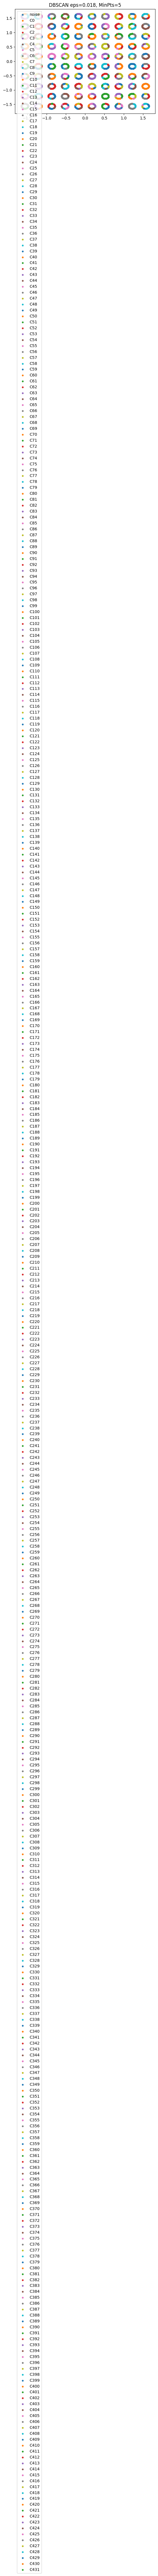

In [94]:
if X.shape[1] == 2:
    unique = sorted(set(labels))
    for lab in unique:
        mask = labels == lab
        plt.scatter(X[mask,0], X[mask,1], s=12, label=("noise" if lab==-1 else f"C{lab}"))
    plt.legend()
    plt.title(f"DBSCAN eps={eps:.3f}, MinPts={min_pts}")
    plt.show()


## Dimensionality Reduction using PCA

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['x', 'y']])

# 2. Apply PCA
pca = PCA(n_components=2)   # You can use 1 or 2 to visualize explained variance
X_pca = pca.fit_transform(X_scaled)

# 3. Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.50050531 0.49949469]
Total Variance Explained: 1.0


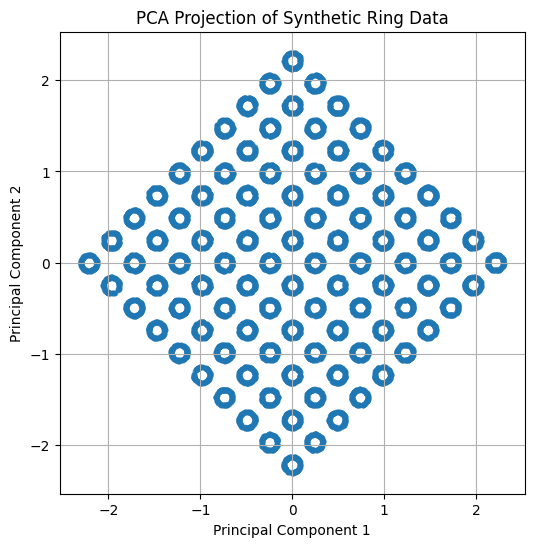

In [103]:
plt.figure(figsize=(6,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=10, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Synthetic Ring Data')
plt.grid(True)
plt.show()